In [1]:
import uproot
from matplotlib.pyplot import *
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from scipy import interp
from scipy import stats

import seaborn as sns
from tools import efficiency

## Open the root file and convert the tree into a dataframe 

In [2]:
Tree = uproot.open("Kristin/output_ntuple_MCTriggers_TTbar_8TeV-Madspin_aMCatNLO-herwig.root")['aod2nanoaod/Events']
Tree

<TTree b'Events' at 0x7fbdb2b07fa0>

In [3]:
Tree.show()

run                        (no streamer)              asdtype('>i4')
luminosityBlock            (no streamer)              asdtype('>u4')
event                      (no streamer)              asdtype('>u8')
HLT_DiJet40Eta2p6_BTagIP3DFastPV
                           (no streamer)              asdtype('bool')
DST_Physics                (no streamer)              asdtype('bool')
AlCa_EcalEtaEBonly         (no streamer)              asdtype('bool')
AlCa_EcalEtaEEonly         (no streamer)              asdtype('bool')
AlCa_EcalPhiSym            (no streamer)              asdtype('bool')
AlCa_EcalPi0EBonly         (no streamer)              asdtype('bool')
AlCa_EcalPi0EEonly         (no streamer)              asdtype('bool')
AlCa_LumiPixels_Random     (no streamer)              asdtype('bool')
AlCa_LumiPixels_ZeroBias   (no streamer)              asdtype('bool')
AlCa_LumiPixels            (no streamer)              asdtype('bool')
DST_Ele8_CaloIdL_CaloIsoVL_TrkIdVL_TrkIsoVL_HT250
          

In [4]:
dataframe = Tree.pandas.df(flatten=False)

In [5]:
dataframe

run  luminosityBlock   event  HLT_DiJet40Eta2p6_BTagIP3DFastPV  \
entry                                                                   
0        1             1752   25201                             False   
1        1             1752   25202                             False   
2        1             1752   25203                             False   
3        1             1752   25204                             False   
4        1             1752   25205                             False   
...    ...              ...     ...                               ...   
9995     1            17947  382909                             False   
9996     1            17947  382910                             False   
9997     1            17947  382911                             False   
9998     1            17947  382912                             False   
9999     1            17947  382913                             False   

       DST_Physics  AlCa_EcalEtaEBonly  AlCa_EcalEtaEEonly  AlCa_EcalPhiSym  \
entry                                                                         
0             True               False               False             True   
1             True               False               False             True   
2             True                True               False             True   
3             True               False               False             True   
4             True               False               False             True   
...            ...                 ...                 ...              ...   
9995          True               False                True             True   
9996          True               False               False             True   
9997          True               False               False             True   
9998          True               False               False             True   
9999          True               False               False             True   

       AlCa_EcalPi0EBonly  AlCa_EcalPi0EEonly  ...  \
entry                                          ...   
0                   False               False  ...   
1                    True               False  ...   
2                    True               False  ...   
3                   False               False  ...   
4                   False               False  ...   
...                   ...                 ...  ...   
9995                False                True  ...   
9996                False               False  ...   
9997                False               False  ...   
9998                False               False  ...   
9999                False               False  ...   

                                                Jet_mass  \
entry                                                      
0      [23.55738, 11.34401, 8.327572, 5.4410057, 3.56...   
1      [11.357451, 8.106963, 9.314485, 4.3475947, 5.1...   
2      [19.032875, 13.776991, 13.301004, 7.423729, 6....   
3      [9.466021, 9.080073, 9.392552, 3.899962, 6.269...   
4            [13.719177, 24.095625, 4.1192408, 4.244282]   
...                                                  ...   
9995                     [10.540256, 7.075528, 10.08068]   
9996   [12.329852, 12.857339, 9.339015, 9.515019, 9.8...   
9997   [15.2511015, 13.357816, 9.354951, 8.687843, 5....   
9998   [7.4399323, 5.538171, 4.2213635, 4.5770707, 3....   
9999   [13.259354, 11.792695, 10.779658, 11.694788, 8...   

                                                Jet_puId  \
entry                                                      
0                         [True, True, True, True, True]   
1                         [True, True, True, True, True]   
2      [True, True, True, True, True, True, True, Tru...   
3                         [True, True, True, True, True]   
4                               [True, True, True, True]   
...                                                  ...   
9995                                  [True, True, True]   
9996 

In [6]:
dataframe.head()

run  luminosityBlock  event  HLT_DiJet40Eta2p6_BTagIP3DFastPV  \
entry                                                                  
0        1             1752  25201                             False   
1        1             1752  25202                             False   
2        1             1752  25203                             False   
3        1             1752  25204                             False   
4        1             1752  25205                             False   

       DST_Physics  AlCa_EcalEtaEBonly  AlCa_EcalEtaEEonly  AlCa_EcalPhiSym  \
entry                                                                         
0             True               False               False             True   
1             True               False               False             True   
2             True                True               False             True   
3             True               False               False             True   
4             True               False               False             True   

       AlCa_EcalPi0EBonly  AlCa_EcalPi0EEonly  ...  \
entry                                          ...   
0                   False               False  ...   
1                    True               False  ...   
2                    True               False  ...   
3                   False               False  ...   
4                   False               False  ...   

                                                Jet_mass  \
entry                                                      
0      [23.55738, 11.34401, 8.327572, 5.4410057, 3.56...   
1      [11.357451, 8.106963, 9.314485, 4.3475947, 5.1...   
2      [19.032875, 13.776991, 13.301004, 7.423729, 6....   
3      [9.466021, 9.080073, 9.392552, 3.899962, 6.269...   
4            [13.719177, 24.095625, 4.1192408, 4.244282]   

                                                Jet_puId  \
entry                                                      
0                         [True, True, True, True, True]   
1                         [True, True, True, True, True]   
2      [True, True, True, True, True, True, True, Tru...   
3                         [True, True, True, True, True]   
4                               [True, True, True, True]   

                                                Jet_btag  nGenPart  \
entry                                                                
0      [0.014201981, 0.18896931, 0.11340804, 0.274069...         5   
1      [0.043697737, -10.0, 0.047048293, 0.15198223, ...         6   
2      [-1.0, 0.15037195, 0.025635006, 0.9312835, 0.2...        15   
3             [0.9619323, -1.0, -10.0, 0.15089619, -1.0]         9   
4        [0.9699943, 0.11081787, 0.08129466, 0.95988595]         4   

                                              GenPart_pt  \
entry                                                      
0      [23.961946, 23.961946, 23.961946, 23.961946, 0...   
1      [13.765849, 3.1205168, 3.1205168, 3.1205168, 1...   
2      [14.005669, 14.005669, 14.005669, 14.005669, 1...   
3      [56.20294, 29.441156, 29.441156, 8.664792, 56....   
4       [0.07798007, 0.07798007, 0.07798007, 0.05250236]   

                                             GenPart_eta  \
entry                                                      
0      [-1.4342377, -1.4342377, -1.4342377, -1.434237...   
1      [-0.3717337, -0.8770108, -0.8770108, -0.877010...   
2      [1.4365848, 1.4365848, 1.4365848, 1.4365848, 1...   
3      [1.099108, -0.24074964, -0.24074964, 1.5750351...   
4       [-1.2852108, -1.2852108, -1.2852108, -0.6638232]   

                                             GenPart_phi  \
entry                                                      
0      [2.0174305, 2.0174305, 2.0174305, 2.0174305, -...   
1      [-2.8505454, -1.0849935, -1.0849935, -1.084993...   
2      [-1.1510769, -1.1510769, -1.1510769, -1.151076...   
3      [-0.5874918, -0.9764921, -0.9764921, 2.2001147...   
4       [-0.4580349, -0.4580349, -

## Make efficiency plot for MET triggers specified in a list

/Users/ceciliamac/Desktop/UChicago_work/SelfDrivingTrigger/CMSOpenData/tools.py:92: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


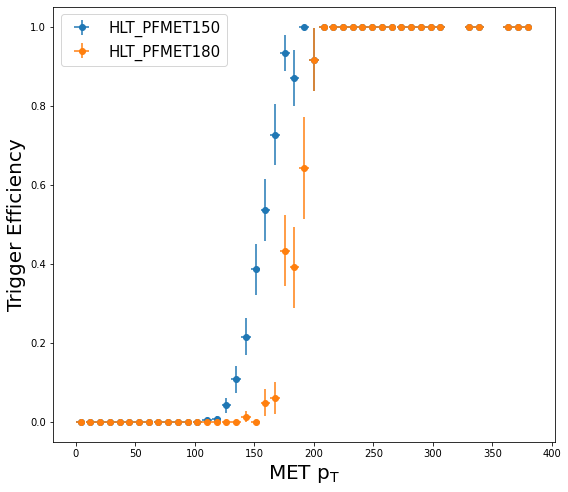

In [7]:
n_bins = 50
x_range = (0, 400) 

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,8))
plt.xlabel(r'MET p$_{\rm T}$', fontsize=20)
temp_list = ['HLT_PFMET150',
     'HLT_PFMET180'
] 
plt.ylabel('Trigger Efficiency', fontsize=20)
for trigger in temp_list:
    selected = dataframe[dataframe[trigger] == True]
    eff_numerator = selected['MET_pt'].to_numpy()
    eff_denominator = dataframe['MET_pt'].to_numpy()
    eff_numerator_w = [1.] * len(eff_numerator)
    eff_denominator_w = [1.] * len(eff_denominator)
    eff, unc_low, unc_up, bins, bins_mid, unc_x = efficiency(num=eff_numerator, 
                                                         den=eff_denominator, 
                                                         num_w=eff_numerator_w, 
                                                         den_w=eff_denominator_w, 
                                                         n_bins=n_bins, 
                                                         limits=x_range)
    ax.errorbar(bins_mid, eff, 
            yerr=[unc_low, unc_up], xerr=unc_x,
            fmt='o',
            label=trigger)
    plt.legend(prop={'size': 15})
    #plt.savefig('EfficiencyPlots/PFMET.pdf')

## Make efficiency plot for jet triggers specified in a list

/Users/ceciliamac/Desktop/UChicago_work/SelfDrivingTrigger/CMSOpenData/tools.py:92: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h
/Users/ceciliamac/Desktop/UChicago_work/SelfDrivingTrigger/CMSOpenData/tools.py:92: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h
/Users/ceciliamac/Desktop/UChicago_work/SelfDrivingTrigger/CMSOpenData/tools.py:92: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h
/Users/ceciliamac/Desktop/UChicago_work/SelfDrivingTrigger/CMSOpenData/tools.py:92: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h
/Users/ceciliamac/Desktop/UChicago_work/SelfDrivingTrigger/CMSOpenData/tools.py:92: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h
/Users/ceciliamac/Desktop/UChicago_work/SelfDrivingTrigger/CMSOpenData/tools.py:92: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_

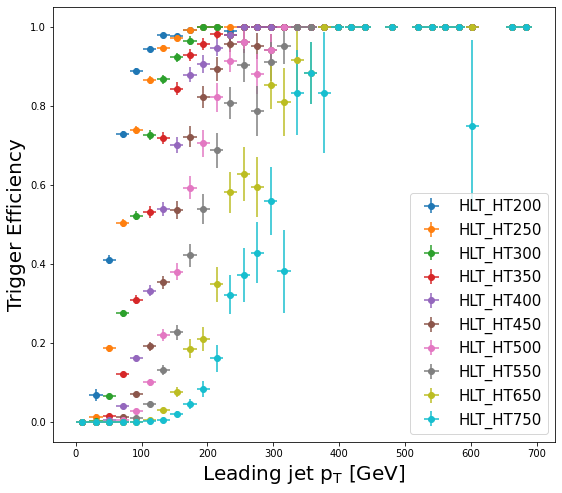

In [8]:
n_bins = 50
x_range = (0, 1000) 

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,8))
plt.xlabel(r'Leading jet p$_{\rm T}$ [GeV]', fontsize=20)
temp_list = [ 
     'HLT_HT200',
     'HLT_HT250',
     'HLT_HT300',
     'HLT_HT350',
     'HLT_HT400',
     'HLT_HT450',
     'HLT_HT500',
     'HLT_HT550',
     'HLT_HT650',
     'HLT_HT750'

] 
plt.ylabel('Trigger Efficiency', fontsize=20)
for trigger in temp_list:
    selected = dataframe[dataframe[trigger] == True]
    eff_numerator = selected['Jet_pt'].apply(lambda x: x[0])
    eff_numerator = eff_numerator.to_numpy()
    eff_denominator = dataframe['Jet_pt'].apply(lambda x: x[0])
    eff_denominator = eff_denominator.to_numpy()
    eff_numerator_w = [1.] * len(eff_numerator)
    eff_denominator_w = [1.] * len(eff_denominator)
    eff, unc_low, unc_up, bins, bins_mid, unc_x = efficiency(num=eff_numerator, 
                                                         den=eff_denominator, 
                                                         num_w=eff_numerator_w, 
                                                         den_w=eff_denominator_w, 
                                                         n_bins=n_bins, 
                                                         limits=x_range)
    ax.errorbar(bins_mid, eff, 
            yerr=[unc_low, unc_up], xerr=unc_x,
            fmt='o',
            label=trigger)
    plt.legend(prop={'size': 15})
    plt.savefig('EfficiencyPlots/HT_Triggers/HT_leadingjet.pdf')

## Make efficiency plot for multijet triggers

/Users/ceciliamac/Desktop/UChicago_work/SelfDrivingTrigger/CMSOpenData/tools.py:92: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


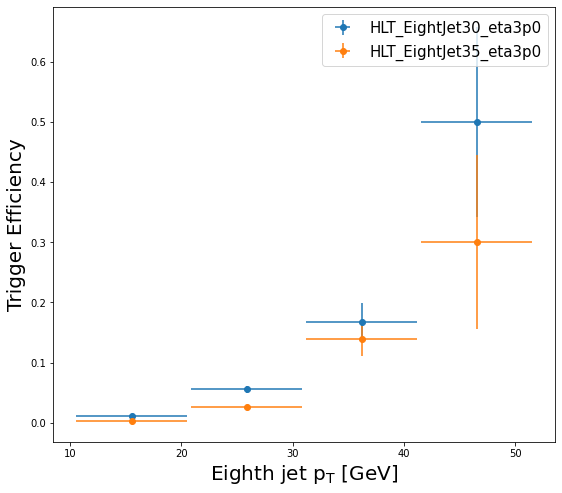

In [9]:
n_bins = 30
x_range = (0, 300) 

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,8))
plt.xlabel(r'Eighth jet p$_{\rm T}$ [GeV]', fontsize=20)
temp_list = [ 
     'HLT_EightJet30_eta3p0',
     'HLT_EightJet35_eta3p0'
] 
plt.ylabel('Trigger Efficiency', fontsize=20)
for trigger in temp_list:
    selected = dataframe[dataframe[trigger] == True]
    eff_numerator = selected['Jet_pt'].apply(lambda x: x[7] if len(x) > 7 else -999)
    eff_numerator = eff_numerator.to_numpy()
    eff_denominator = dataframe['Jet_pt'].apply(lambda x: x[7] if len(x) > 7 else -999)
    eff_denominator = eff_denominator.to_numpy()
    eff_numerator_w = [1.] * len(eff_numerator)
    eff_denominator_w = [1.] * len(eff_denominator)
    eff, unc_low, unc_up, bins, bins_mid, unc_x = efficiency(num=eff_numerator, 
                                                         den=eff_denominator, 
                                                         num_w=eff_numerator_w, 
                                                         den_w=eff_denominator_w, 
                                                         n_bins=n_bins, 
                                                         limits=x_range)
    ax.errorbar(bins_mid, eff, 
            yerr=[unc_low, unc_up], xerr=unc_x,
            fmt='o',
            label=trigger)
    plt.legend(prop={'size': 15})
    #plt.savefig('EfficiencyPlots/MultiJet_Triggers/SixJet.pdf')

## Make efficiency plot for Muon triggers

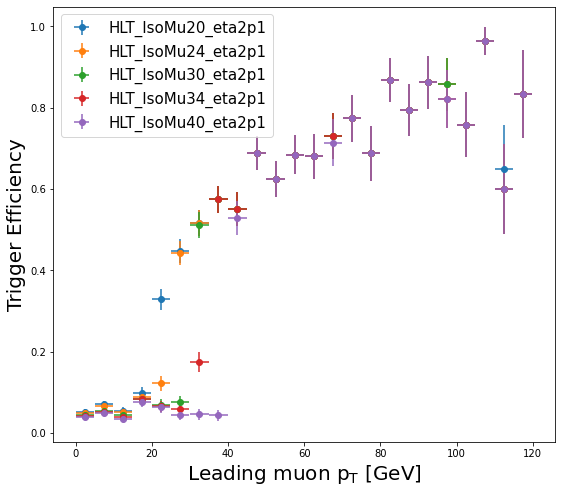

In [10]:
n_bins = 25
x_range = (0, 120) 

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,8))
plt.xlabel(r'Leading muon p$_{\rm T}$ [GeV]', fontsize=20)
temp_list = [
     'HLT_IsoMu20_eta2p1',
     'HLT_IsoMu24_eta2p1',
     'HLT_IsoMu30_eta2p1',
     'HLT_IsoMu34_eta2p1',
     'HLT_IsoMu40_eta2p1'


] 
plt.ylabel('Trigger Efficiency', fontsize=20)
for trigger in temp_list:
    selected = dataframe[dataframe[trigger] == True]
    eff_numerator = selected['Muon_pt'].apply(lambda x: x[0] if len(x) > 0 else -999)
    eff_numerator = eff_numerator.to_numpy()
    eff_denominator = dataframe['Muon_pt'].apply(lambda x: x[0] if len(x) > 0 else -999)
    eff_denominator = eff_denominator.to_numpy()
    eff_numerator_w = [1.] * len(eff_numerator)
    eff_denominator_w = [1.] * len(eff_denominator)
    eff, unc_low, unc_up, bins, bins_mid, unc_x = efficiency(num=eff_numerator, 
                                                         den=eff_denominator, 
                                                         num_w=eff_numerator_w, 
                                                         den_w=eff_denominator_w, 
                                                         n_bins=n_bins, 
                                                         limits=x_range)
    ax.errorbar(bins_mid, eff, 
            yerr=[unc_low, unc_up], xerr=unc_x,
            fmt='o',
            label=trigger)
    plt.legend(prop={'size': 15})
    #plt.savefig('EfficiencyPlots/Muon_Triggers/MuIso_Eta2p1.pdf')

## Make efficiency plot for Elecron triggers

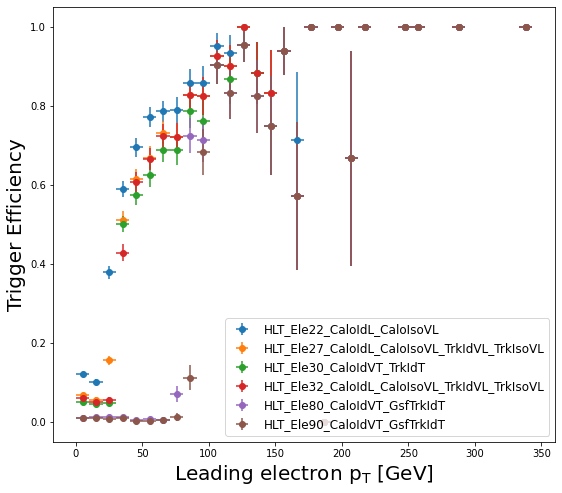

In [11]:
n_bins = 100
x_range = (0, 1000) 

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,8))
plt.xlabel(r'Leading electron p$_{\rm T}$ [GeV]', fontsize=20)
temp_list = [
     'HLT_Ele22_CaloIdL_CaloIsoVL',
     'HLT_Ele27_CaloIdL_CaloIsoVL_TrkIdVL_TrkIsoVL',
     'HLT_Ele30_CaloIdVT_TrkIdT',
     'HLT_Ele32_CaloIdL_CaloIsoVL_TrkIdVL_TrkIsoVL',
     'HLT_Ele80_CaloIdVT_GsfTrkIdT',
     'HLT_Ele90_CaloIdVT_GsfTrkIdT'


] 

plt.ylabel('Trigger Efficiency', fontsize=20)
for trigger in temp_list:
    selected = dataframe[dataframe[trigger] == True]
    eff_numerator = selected['Electron_pt'].apply(lambda x: x[0] if len(x) > 0 else -999)
    eff_numerator = eff_numerator.to_numpy()
    eff_denominator = dataframe['Electron_pt'].apply(lambda x: x[0] if len(x) > 0 else -999)
    eff_denominator = eff_denominator.to_numpy()
    eff_numerator_w = [1.] * len(eff_numerator)
    eff_denominator_w = [1.] * len(eff_denominator)
    eff, unc_low, unc_up, bins, bins_mid, unc_x = efficiency(num=eff_numerator, 
                                                         den=eff_denominator, 
                                                         num_w=eff_numerator_w, 
                                                         den_w=eff_denominator_w, 
                                                         n_bins=n_bins, 
                                                         limits=x_range)
    ax.errorbar(bins_mid, eff, 
            yerr=[unc_low, unc_up], xerr=unc_x,
            fmt='o',
            label=trigger)
    plt.legend(loc=4, prop={'size': 12})
    #plt.savefig('EfficiencyPlots/Electron_Triggers/EleCalo.pdf')

## Example on selection applied to one variable of the dataframe (defines an array containing values only for selected events) 

### This is a simple case, where we want to apply the cut on a variable with single value

In [12]:
selected_numerator = dataframe[dataframe["MET_pt"] > 500].to_numpy()
selected_numerator

array([[1, 1752, 25311, ...,
        array([1.7770000e+00, 6.5360134e-03, 1.7770000e+00, 1.7770000e+00,
       6.5360134e-03, 1.7770000e+00, 1.7770000e+00, 1.7770000e+00,
       6.5360134e-03, 5.1099987e-04, 5.1099987e-04, 5.1099987e-04,
       6.5360134e-03, 1.7770000e+00], dtype=float32),
        array([ 15, -13,  15,  15, -13,  15,  15,  15, -13,  11,  11,  11, -13,
        15], dtype=int32),
        array([2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2], dtype=int32)],
       [1, 17947, 382904, ...,
        array([5.1735120e+00, 2.9138942e+00, 2.9138942e+00, 5.1735120e+00,
       5.1099999e-04, 5.1735120e+00, 5.1735120e+00, 5.1099999e-04,
       3.8675254e-04, 5.1099999e-04, 5.1099999e-04, 5.1099999e-04,
       5.1099999e-04, 5.1735120e+00, 2.9138942e+00, 5.1099999e-04,
       3.4891811e-04, 5.1735120e+00, 2.9138942e+00, 3.4891811e-04,
       3.4891811e-04, 2.9138942e+00, 5.1099999e-04], dtype=float32),
        array([-11,  11,  11, -11,  11, -11, -11,  11,  11,  11, -11,  11, -11,
     

### Here we want to apply a cut at 50 GeV on the leading jet pt

In [13]:
selected_numerator = dataframe['Jet_pt'].apply(lambda x: x[0] if x[0]>50 else -999)
selected_numerator = selected_numerator.to_numpy()
selected_numerator

array([146.62046814,  76.88327026,  84.43566895, ..., 126.65836334,
        80.14199829,  85.23602295])